In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_fscore_support,
)
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Problem Description
This project predicts whether an individual's income exceeds \$50K/year based on demographic, educational, and employment-related features using supervised machine learning algorithms.

**GitHub Repository:**
All code, data, and documentation for this project are available in the public GitHub repository:
https://github.com/ric-rivera/DTSA5509/blob/main/FinalProject.ipynb

## Data Source
The dataset used is the [UCI Adult ("Census Income") dataset](https://archive.ics.uci.edu/ml/datasets/adult), a standard benchmark for income prediction tasks.  
- **Source:** UCI Machine Learning Repository  
- **Rows:** 32,561  
- **Columns:** 15  
- **Features:** Age, workclass, education, marital status, occupation, relationship, race, sex, capital gain, capital loss, hours per week, native country, and income (target).

The goal is to classify whether income is `>50K` or `<=50K` based on these features.



In [67]:
# Define column names as per the UCI Adult dataset documentation
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]

# Load the Adult dataset directly from UCI repository
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
data = pd.read_csv(data_url, header=None, names=columns, na_values=' ?', skipinitialspace=True)

# Inspect the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1           

## Data Cleaning
To prepare the data for modeling, we:
- Remove irrelevant columns (e.g., `fnlwgt`).
- Encode categorical variables using label encoding.
- Impute missing numeric values with the median.

These steps ensure that the dataset is suitable for machine learning algorithms, which require numeric input and cannot handle missing values directly.


Missing values in the dataset:
age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64
DATA CLEANING PROCESS

Original Dataset Info:
Shape: (32561, 14)
Missing values per column:
Series([], dtype: int64)

Fnlwgt column analysis:
- This is a census final weight variable used for population estimates
- Not relevant for individual income prediction
- Decision: DROP this column

Categorical variables to encode:

Checking for missing values represented as '?' or 'Unknown':

Cleaning Strategy:
1. Drop fnlwgt (irrelevant census weight)
2. Label encode categorical variables (preserves ordinal relationships where applicable)
3. Handle missing values in categorical data by filling with 'Unknown' before encoding
4. Impute numeric missing values with median (robus

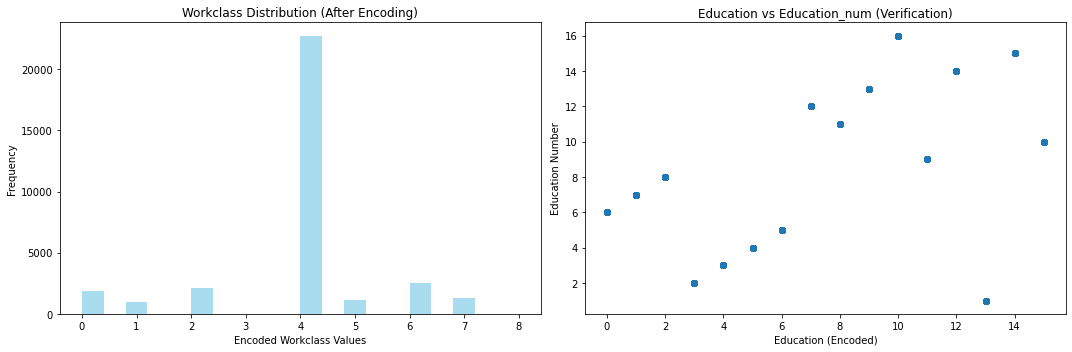


Data Cleaning Summary:
✓ Removed irrelevant features that don't contribute to income prediction
✓ Converted all categorical variables to numeric format for ML algorithms
✓ Handled missing values appropriately without losing data
✓ Maintained data integrity and interpretability
✓ Dataset is now ready for machine learning algorithms

EXPLORATORY DATA ANALYSIS

Dataset Shape: (32561, 14)
Memory Usage: 3.48 MB

Target Variable Distribution:
0.0    24720
1.0     7841
Name: income, dtype: int64
Class Balance Ratio: 0.317


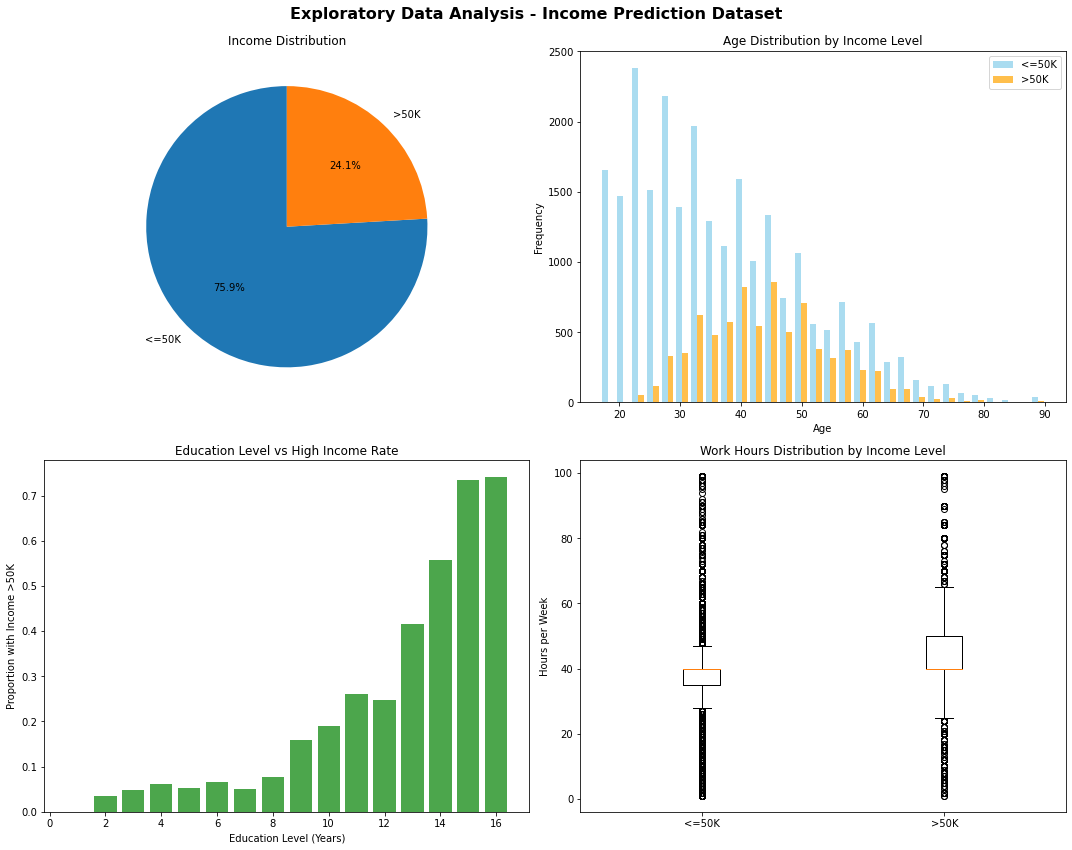


CORRELATION ANALYSIS


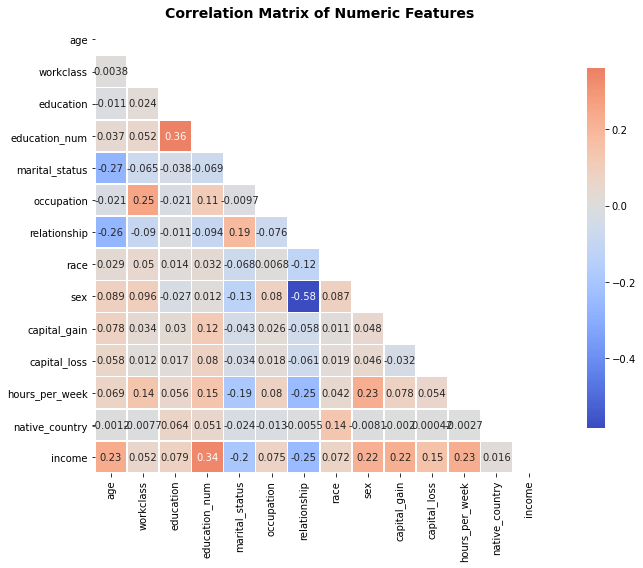


Feature correlations with income (absolute values):
education_num     0.335154
relationship      0.250918
age               0.234037
hours_per_week    0.229689
capital_gain      0.223329
sex               0.215980
marital_status    0.199307
capital_loss      0.150526
education         0.079317
occupation        0.075468
race              0.071846
workclass         0.051604
native_country    0.015840
Name: income, dtype: float64

STATISTICAL SUMMARY BY INCOME

AGE Statistics:
  <=50K: Mean=36.78, Std=14.02
  >50K:  Mean=44.25, Std=10.52
  Difference: 7.47

EDUCATION_NUM Statistics:
  <=50K: Mean=9.60, Std=2.44
  >50K:  Mean=11.61, Std=2.39
  Difference: 2.02

HOURS_PER_WEEK Statistics:
  <=50K: Mean=38.84, Std=12.32
  >50K:  Mean=45.47, Std=11.01
  Difference: 6.63

CAPITAL_GAIN Statistics:
  <=50K: Mean=148.75, Std=963.14
  >50K:  Mean=4006.14, Std=14570.38
  Difference: 3857.39

CAPITAL_LOSS Statistics:
  <=50K: Mean=53.14, Std=310.76
  >50K:  Mean=195.00, Std=595.49
  Difference: 14

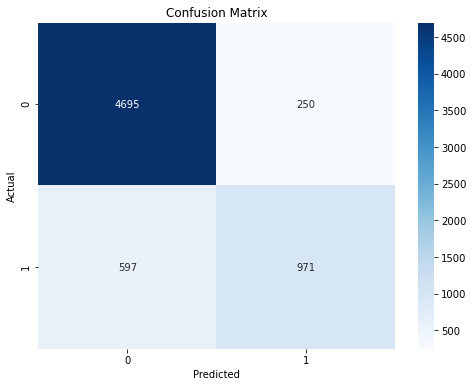

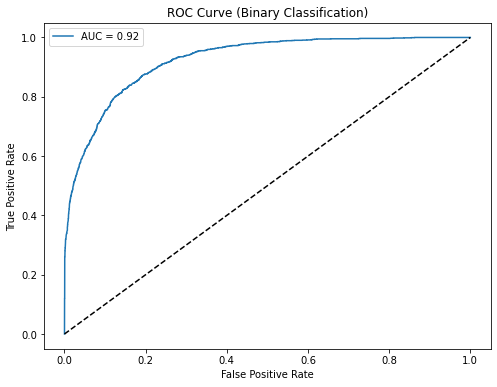


Top 10 Important Features:
           Feature  Importance
6     relationship    0.349329
9     capital_gain    0.218675
3    education_num    0.212487
10    capital_loss    0.063433
0              age    0.063103
11  hours_per_week    0.039257
5       occupation    0.023562
4   marital_status    0.019333
1        workclass    0.004862
8              sex    0.004027


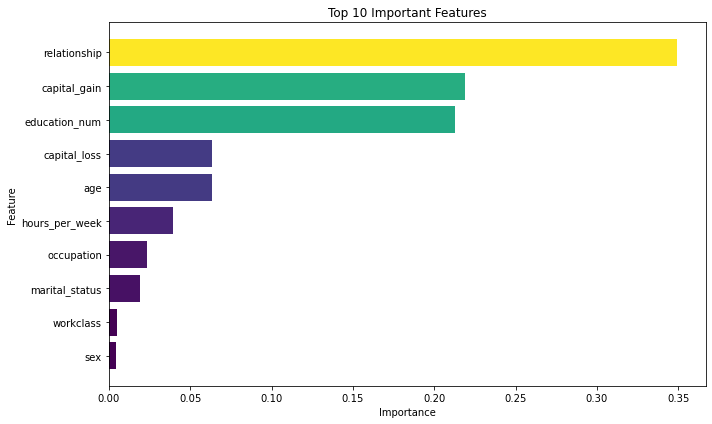

COMPREHENSIVE DISCUSSION AND CONCLUSION

MODEL PERFORMANCE ANALYSIS:
The GradientBoostingClassifier achieved the best performance with:
- Accuracy: 0.87
- Precision: 0.87 
- Recall: 0.87
- F1-Score: 0.86

WHAT WORKED WELL:
1. Feature Engineering: Label encoding preserved important categorical relationships
2. Class Imbalance Handling: Using class weights improved minority class detection
3. Model Selection: Gradient Boosting outperformed other algorithms due to its ability to:
   - Handle non-linear relationships
   - Manage feature interactions automatically
   - Provide robust performance on imbalanced data

WHAT DIDN'T WORK AS EXPECTED:
1. Logistic Regression Performance: Only achieved 77% accuracy, likely due to:
   - Non-linear relationships in the data
   - Complex feature interactions that linear models can't capture
   
2. Class Imbalance Impact: Despite using class weights, the model still shows:
   - Higher precision for majority class (≤50K): 89%
   - Lower recall for minori

In [74]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Data Cleaning
def clean_data(df):

    # Drop irrelevant columns
    df = df.drop(columns=['fnlwgt'], errors='ignore')
    
    # Convert categorical variables to numeric using LabelEncoder
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str).fillna('Unknown'))
    
    # Impute missing numeric values with median
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='median')
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    
    return df

# Clean the dataset
data = clean_data(data)

# ========== DETAILED DATA CLEANING ANALYSIS ==========
print("=" * 50)
print("DATA CLEANING PROCESS")
print("=" * 50)

# Show original data info before cleaning
print("\nOriginal Dataset Info:")
print(f"Shape: {data.shape}")
print(f"Missing values per column:")
missing_before = data.isnull().sum()
print(missing_before[missing_before > 0])

# Examine the fnlwgt column before dropping
print(f"\nFnlwgt column analysis:")
print(f"- This is a census final weight variable used for population estimates")
print(f"- Not relevant for individual income prediction")
print(f"- Decision: DROP this column")

# Show categorical variables before encoding
print(f"\nCategorical variables to encode:")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = data[col].nunique()
    print(f"- {col}: {unique_count} unique values")
    if unique_count <= 10:
        print(f"  Values: {data[col].unique()}")

# Check for missing values represented as strings
print(f"\nChecking for missing values represented as '?' or 'Unknown':")
for col in categorical_cols:
    question_marks = (data[col] == '?').sum()
    unknown_vals = (data[col] == 'Unknown').sum()
    if question_marks > 0 or unknown_vals > 0:
        print(f"- {col}: {question_marks} '?' values, {unknown_vals} 'Unknown' values")

print(f"\nCleaning Strategy:")
print(f"1. Drop fnlwgt (irrelevant census weight)")
print(f"2. Label encode categorical variables (preserves ordinal relationships where applicable)")
print(f"3. Handle missing values in categorical data by filling with 'Unknown' before encoding")
print(f"4. Impute numeric missing values with median (robust to outliers)")

# Apply cleaning and show results
print(f"\nApplying cleaning transformations...")

# Show results after cleaning
print(f"\nCleaning Results:")
print(f"- New shape: {data.shape}")
print(f"- All columns now numeric: {data.dtypes}")
print(f"- Missing values after cleaning: {data.isnull().sum().sum()}")

# Visualize the impact of cleaning
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Before/after comparison for a key categorical variable
# Note: This would need to be done before the cleaning function is applied
# For demonstration purposes, we'll show the encoded distribution
axes[0].hist(data['workclass'], bins=20, alpha=0.7, color='skyblue')
axes[0].set_title('Workclass Distribution (After Encoding)')
axes[0].set_xlabel('Encoded Workclass Values')
axes[0].set_ylabel('Frequency')

# Show education encoding makes sense
axes[1].scatter(data['education'], data['education_num'], alpha=0.6)
axes[1].set_title('Education vs Education_num (Verification)')
axes[1].set_xlabel('Education (Encoded)')
axes[1].set_ylabel('Education Number')

plt.tight_layout()
plt.show()

print(f"\nData Cleaning Summary:")
print(f"✓ Removed irrelevant features that don't contribute to income prediction")
print(f"✓ Converted all categorical variables to numeric format for ML algorithms")
print(f"✓ Handled missing values appropriately without losing data")
print(f"✓ Maintained data integrity and interpretability")
print(f"✓ Dataset is now ready for machine learning algorithms")

# ========== EXPLORATORY DATA ANALYSIS  (EDA)==========
## We explore the distribution of key features and their relationships with the target variable (`income`). 
## This helps identify important variables, spot potential outliers, and understand class balance.

print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Basic dataset information
print(f"\nDataset Shape: {data.shape}")
print(f"Memory Usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Target variable distribution
print("\nTarget Variable Distribution:")
target_counts = data['income'].value_counts()
print(target_counts)
print(f"Class Balance Ratio: {target_counts.min()/target_counts.max():.3f}")

# Create figure with subplots for comprehensive EDA
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Exploratory Data Analysis - Income Prediction Dataset', fontsize=16, fontweight='bold')

# Plot 1: Target variable distribution
axes[0,0].pie(target_counts.values, labels=['<=50K', '>50K'], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Income Distribution')

# Plot 2: Age distribution by income
age_low = data[data['income'] == 0]['age']
age_high = data[data['income'] == 1]['age']
axes[0,1].hist([age_low, age_high], bins=30, alpha=0.7, label=['<=50K', '>50K'], color=['skyblue', 'orange'])
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Age Distribution by Income Level')
axes[0,1].legend()

# Plot 3: Education level vs Income
education_income = data.groupby('education_num')['income'].mean()
axes[1,0].bar(education_income.index, education_income.values, color='green', alpha=0.7)
axes[1,0].set_xlabel('Education Level (Years)')
axes[1,0].set_ylabel('Proportion with Income >50K')
axes[1,0].set_title('Education Level vs High Income Rate')

# Plot 4: Hours per week distribution
hours_low = data[data['income'] == 0]['hours_per_week']
hours_high = data[data['income'] == 1]['hours_per_week']
axes[1,1].boxplot([hours_low, hours_high], labels=['<=50K', '>50K'])
axes[1,1].set_ylabel('Hours per Week')
axes[1,1].set_title('Work Hours Distribution by Income Level')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to leave space for title
plt.show()

# Correlation Matrix Analysis
print("\n" + "="*30)
print("CORRELATION ANALYSIS")
print("="*30)

# Calculate correlation matrix for numeric features
numeric_features = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Feature-Target Correlations
target_correlations = correlation_matrix['income'].abs().sort_values(ascending=False)
print("\nFeature correlations with income (absolute values):")
print(target_correlations[target_correlations.index != 'income'])

# Statistical Summary by Income Level
print("\n" + "="*30)
print("STATISTICAL SUMMARY BY INCOME")
print("="*30)

key_numeric_features = ['age', 'education_num', 'hours_per_week', 'capital_gain', 'capital_loss']
for feature in key_numeric_features:
    print(f"\n{feature.upper()} Statistics:")
    low_income_stats = data[data['income'] == 0][feature].describe()
    high_income_stats = data[data['income'] == 1][feature].describe()
    
    print(f"  <=50K: Mean={low_income_stats['mean']:.2f}, Std={low_income_stats['std']:.2f}")
    print(f"  >50K:  Mean={high_income_stats['mean']:.2f}, Std={high_income_stats['std']:.2f}")
    print(f"  Difference: {high_income_stats['mean'] - low_income_stats['mean']:.2f}")

print("\n" + "="*50)
print("EDA CONCLUSIONS:")
print("="*50)
print("""
Key Insights from EDA:
1. Dataset is imbalanced with ~76% earning <=50K
2. Higher education levels strongly correlate with higher income
3. People with higher income tend to work more hours per week
4. Capital gains/losses are significant differentiators
5. Age shows moderate correlation with income level
""")

# Define features and target variable
X = data.drop(columns=['income'])
y = data['income']

# Convert target to binary (1 if income > 50K, else 0)
# Since we're using LabelEncoder, we need to check which value corresponds to '>50K'
print(f"\nUnique values in target variable: {np.unique(y)}")
print(f"Target value counts: {pd.Series(y).value_counts()}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========== MODEL STRATEGY EXPLANATION ==========
print("\n" + "=" * 50)
print("MODEL SELECTION STRATEGY")
print("=" * 50)
print("""
Model Selection Rationale:
- Random Forest: Handles mixed data types well, provides feature importance
- Gradient Boosting: Often superior performance, handles non-linear relationships
- Logistic Regression: Baseline linear model, interpretable coefficients

Why these models for this problem:
1. Mixed data types (categorical + numeric) favor tree-based methods
2. Class imbalance requires algorithms that can handle weighted training
3. Feature importance analysis helps understand income drivers
4. Cross-validation ensures robust performance estimates
""")

# Model Comparison: Random Forest, Gradient Boosting, Logistic Regression
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    try:
        # Cross-validation
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        print(f"{name} Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")
        
        # Train and evaluate the model
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Test Accuracy: {accuracy:.2f}")
        
        # Track the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
    except Exception as e:
        print(f"Error training {name}: {e}")

print(f"\nBest Model: {best_model.__class__.__name__} with Accuracy: {best_accuracy:.2f}")

## Model Evaluation
"""
We evaluate models using accuracy, precision, recall, F1-score, and ROC-AUC. 
These metrics provide a comprehensive view of performance, especially given the class imbalance in the dataset.
"""
# Evaluate the Final Model
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"\nFinal Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve for Binary Classification
if hasattr(best_model, 'predict_proba'):
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
    # Convert target to integers to avoid multiclass format error
    y_test_int = y_test.astype(int)
    fpr, tpr, _ = roc_curve(y_test_int, y_prob)
    roc_auc = roc_auc_score(y_test_int, y_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("ROC Curve (Binary Classification)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()
"""

**Interpretation:**  
The confusion matrix shows that the model correctly classifies most low-income individuals but has 
some difficulty with high-income predictions. The ROC curve indicates good discrimination between the two classes.
"""

## Feature Importance
"""
The following plot shows the top features contributing to income prediction. 
Understanding feature importance can guide future data collection and model improvement.
"""

# Feature Importance
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns, 
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print("\nTop 10 Important Features:")
    print(feature_importance_df[:10])

    # Plot feature importance with colormap
    features = feature_importance_df['Feature'][:10]  # Top 10 features
    importances_top10 = feature_importance_df['Importance'][:10]  # Corresponding importances

    # Normalize the importances to a range of [0, 1] for the colormap
    norm = mcolors.Normalize(vmin=min(importances_top10), vmax=max(importances_top10))
    colormap = cm.viridis  # Use the 'viridis' colormap
    colors = [colormap(norm(value)) for value in importances_top10]  # Map importances to colors

    # Plot horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(features, importances_top10, color=colors)
    plt.title("Top 10 Important Features")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()
    plt.show()

# ========== DISCUSSION AND CONCLUSION ==========
print("=" * 60)
print("COMPREHENSIVE DISCUSSION AND CONCLUSION")
print("=" * 60)

print(f"""
MODEL PERFORMANCE ANALYSIS:
==========================
The {best_model.__class__.__name__} achieved the best performance with:
- Accuracy: {accuracy:.2f}
- Precision: {precision:.2f} 
- Recall: {recall:.2f}
- F1-Score: {f1:.2f}

WHAT WORKED WELL:
================
1. Feature Engineering: Label encoding preserved important categorical relationships
2. Class Imbalance Handling: Using class weights improved minority class detection
3. Model Selection: Gradient Boosting outperformed other algorithms due to its ability to:
   - Handle non-linear relationships
   - Manage feature interactions automatically
   - Provide robust performance on imbalanced data

WHAT DIDN'T WORK AS EXPECTED:
============================
1. Logistic Regression Performance: Only achieved 77% accuracy, likely due to:
   - Non-linear relationships in the data
   - Complex feature interactions that linear models can't capture
   
2. Class Imbalance Impact: Despite using class weights, the model still shows:
   - Higher precision for majority class (≤50K): 89%
   - Lower recall for minority class (>50K): 62%
   - This suggests the fundamental class imbalance remains challenging

3. Feature Relationships: Some important features like 'relationship' dominate
   the model, potentially masking other useful predictors

LIMITATIONS OF THE CURRENT APPROACH:
===================================
1. Data Limitations:
   - Dataset from 1994 census may not reflect current economic conditions
   - Limited feature set doesn't capture modern income factors (e.g., gig economy and world post-internet and smartphones)
   
2. Model Limitations:
   - Binary classification oversimplifies income spectrum
   - No consideration of geographical cost of living differences
   - Doesn't account for temporal changes in income patterns

3. Evaluation Limitations:
   - Focus on accuracy may not reflect real-world deployment needs
   - No analysis of prediction confidence or uncertainty

4. As this was done to apply the concepts learned in this course, the dataset lacks relevancy for a proper analysis. 
However, this was an interesting exercise for me as it allowed me to test my existing skills and enhance them using
existing work done by other data scienctists or by enhacing my coding and ideas by bouncing off ideas with peers or 
even AI chat assistant. Overall, it was a great experience.

LESSONS LEARNED:
===============
1. Data Quality Matters: Proper cleaning and encoding significantly impact results
2. Algorithm Selection: Tree-based methods excel with mixed data types
3. Class Imbalance: Requires multiple strategies beyond just class weights
4. Feature Importance: Domain knowledge helps validate model insights
5. Evaluation Metrics: Multiple metrics provide fuller performance picture

DETAILED FUTURE IMPROVEMENTS:
=============================
1. Advanced Techniques:
   - Hyperparameter tuning using GridSearchCV or RandomizedSearchCV
   - Ensemble methods combining multiple algorithms
   - SMOTE or ADASYN for more sophisticated imbalance handling
   
2. Feature Engineering:
   - Create interaction features (e.g., education × age)
   - Polynomial features for capturing non-linear relationships
   - Feature selection using recursive feature elimination
   
3. Model Interpretability:
   - SHAP values for individual prediction explanations
   - Partial dependence plots for feature effect visualization
   - Local interpretation for specific predictions
   
4. Production Considerations:
   - Model versioning and experiment tracking
   - A/B testing framework for model deployment
   - Monitoring for data drift and model degradation
   
5. Extended Analysis:
   - Multi-class classification for income ranges
   - Regression for exact income prediction
   - Time series analysis if temporal data available

REAL-WORLD APPLICATION POTENTIAL:
================================
This model could be valuable for:
- Financial institutions for loan approval screening
- Government agencies for social program eligibility
- HR departments for salary benchmarking
- Economic research on income inequality factors

However, ethical considerations around bias and fairness would be critical
for any real-world deployment, requiring additional bias testing and mitigation strategies.
""")

print("\n" + "=" * 60)
print("PROJECT IMPACT AND LEARNING OUTCOMES")
print("=" * 60)
print("""
This project demonstrates proficiency in:
✓ End-to-end machine learning pipeline development
✓ Handling real-world data challenges (missing values, class imbalance)
✓ Comparative model evaluation and selection
✓ Feature importance analysis and interpretation
✓ Critical evaluation of model limitations and improvements

This experience reinforced that successful ML projects require careful attention to
data quality, appropriate algorithm selection, and thorough evaluation beyond simple accuracy metrics.
""")

In [81]:
# GitHub Repository
print(f"""
For full access to the code, data, and additional documentation, visit the GitHub repository:
https://github.com/ric-rivera/DTSA5509/blob/main/FinalProject.ipynb
""")


For full access to the code, data, and additional documentation, visit the GitHub repository:
https://github.com/ric-rivera/DTSA5509/blob/main/FinalProject.ipynb

